In [228]:
import wandb
from collections import defaultdict

In [231]:
api = wandb.Api()
runs = api.runs("kilian/lift")

# Filter runs by the "beta_sweep" tag
beta_sweep_runs = [run for run in runs if "beta_sweep" in run.tags and run.state == "finished"]

# Output the filtered runs
print(f"Found {len(beta_sweep_runs)} runs with the tag 'beta_sweep'.")

Found 60 runs with the tag 'beta_sweep'.


In [232]:
run_data = defaultdict(list)

for run in beta_sweep_runs:
    run_id = run.id
    history = run.history(samples=10000)
    beta = run.config["encoder"]["beta_2"]
    run_data[beta].append(history.encoder_reward.values[-1])

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


betas = list(run_data.keys())
rwd_mean = [np.mean(val) for val in run_data.values()]
rwd_std = [np.std(val) for val in run_data.values()]
data = pd.DataFrame({
    'Scaling Factor': betas,
    'Mean Reward': rwd_mean,
    'Standard Deviation': rwd_std
})

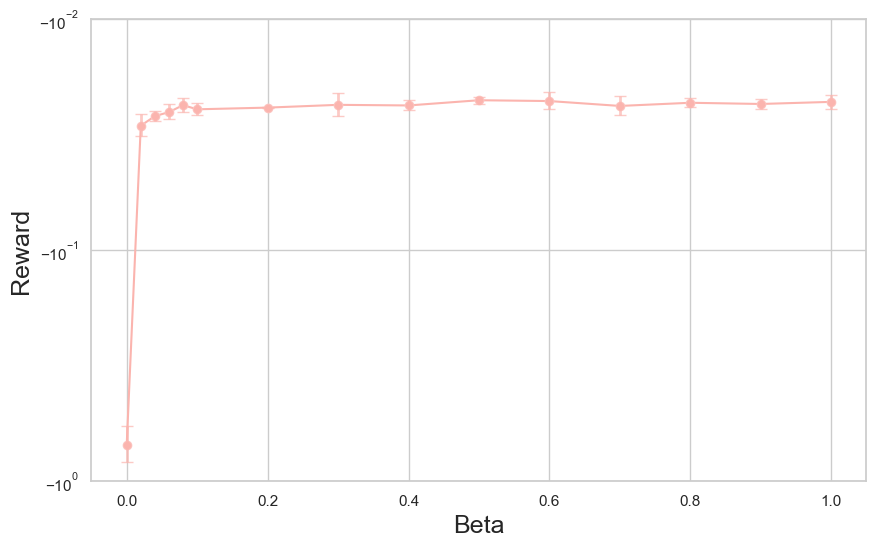

In [226]:
cmap = plt.get_cmap('Pastel1')
# set fontsize
plt.rc('font', size=16)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.lineplot(x='Scaling Factor', y='Mean Reward', data=data, marker='o', errorbar=None, color=cmap(0))
ax.errorbar(data['Scaling Factor'], data['Mean Reward'], yerr=data['Standard Deviation'], fmt='o', ecolor=cmap(0), elinewidth=2, capsize=4, alpha=0.7, color=cmap(0))

ax.set_yscale('symlog', linthresh=0.01)

plt.ylim(-1., -0.01)
plt.xlabel('Beta', fontsize=18)
plt.ylabel('Reward', fontsize=18)
plt.savefig('../figures/teacher_beta.png', dpi=400)
plt.show()